*The content of this notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [11]:
plt.style.use('Solarize_Light2')

In [3]:
plt.style.available[:7]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background']

# Simple Line Plots
Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

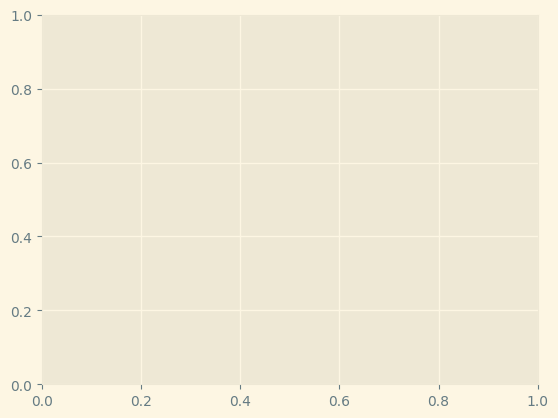

In [4]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

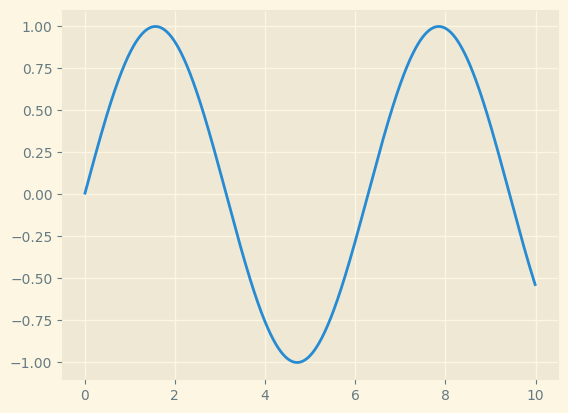

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [ ]:
x

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background


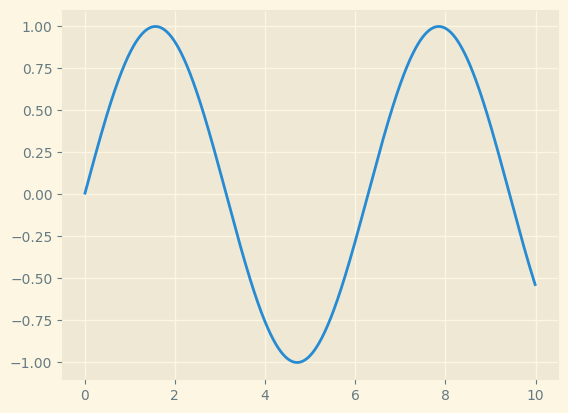

In [8]:
plt.plot(x, np.sin(x));


If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

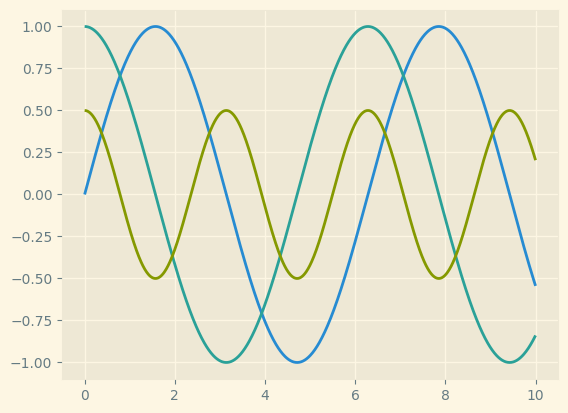

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(x, np.cos(2 * x) / 2);

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles
The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

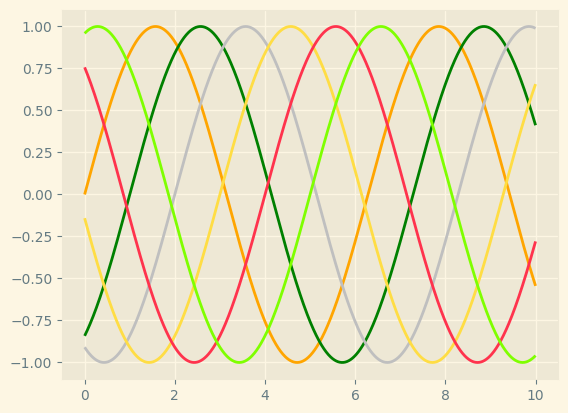

In [12]:
plt.plot(x, np.sin(x - 0), color='orange')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

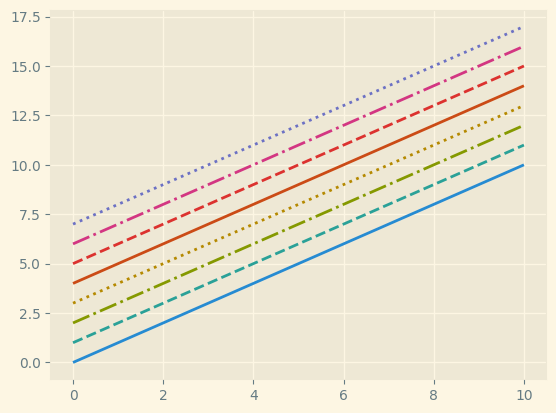

In [13]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted




If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

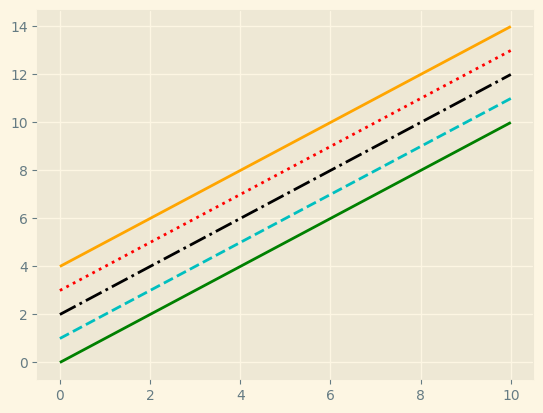

In [14]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red
plt.plot(x, x + 4, color = 'orange', linestyle = '-');

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

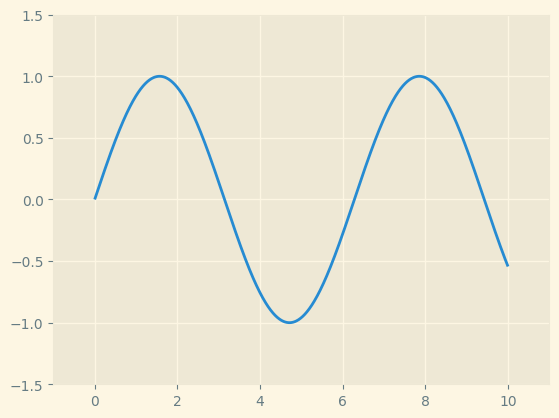

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

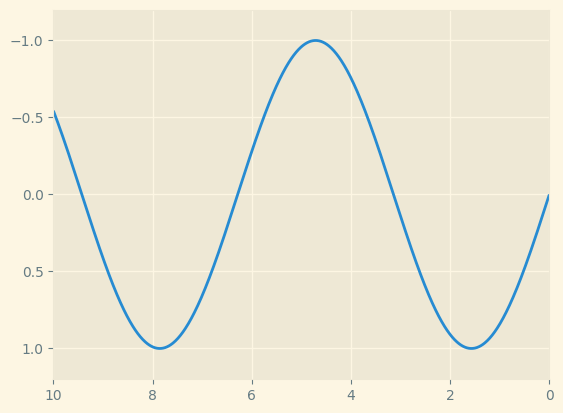

In [16]:
#If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

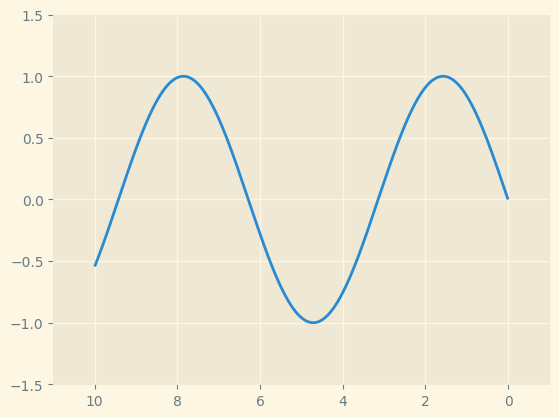

In [17]:
# ``[xmin, xmax, ymin, ymax]``
plt.plot(x, np.sin(x))
plt.axis([11, -1, -1.5, 1.5]);

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

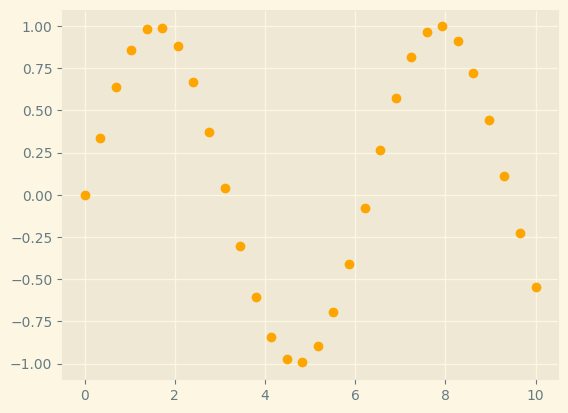

In [18]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='orange');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

In [ ]:
plt.plot(x, y, 'o-r');


In [ ]:
plt.plot(x, y, '-p', color='orange',
         markersize=15, linewidth=4,
         markerfacecolor='yellow',
         markeredgecolor='red',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

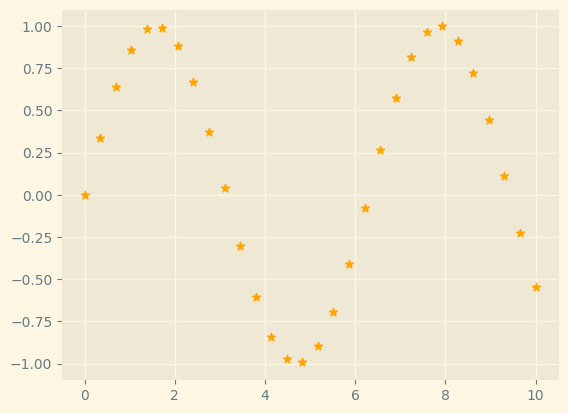

In [19]:
plt.scatter(x, y, marker='*', color = 'orange');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

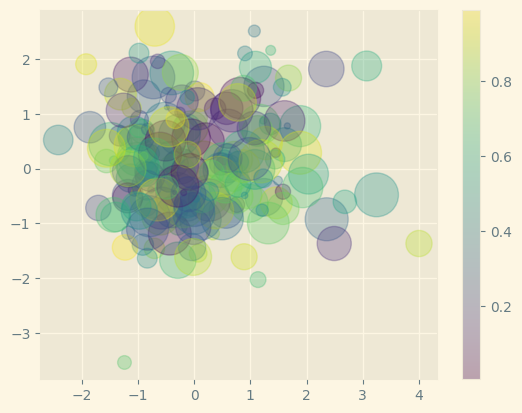

In [20]:
N = 200
rng = np.random.RandomState(300)
x = rng.randn(N)
y = rng.randn(N)
colors = rng.rand(N)
sizes = 1000 * rng.rand(N)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

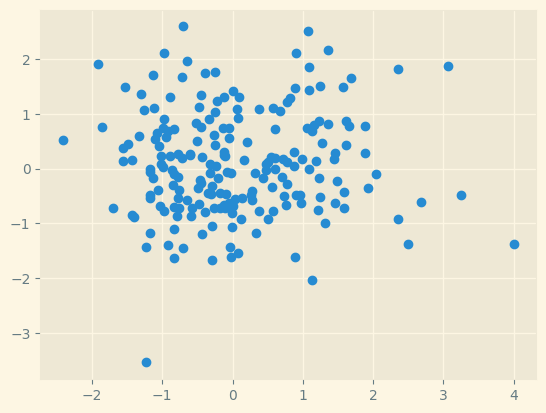

In [21]:
plt.scatter(x, y)

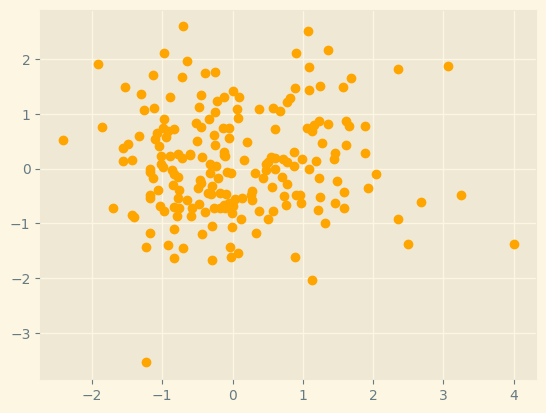

In [27]:
plt.plot(x, y, 'o', color='orange');

## Pie Basic Chart

Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.

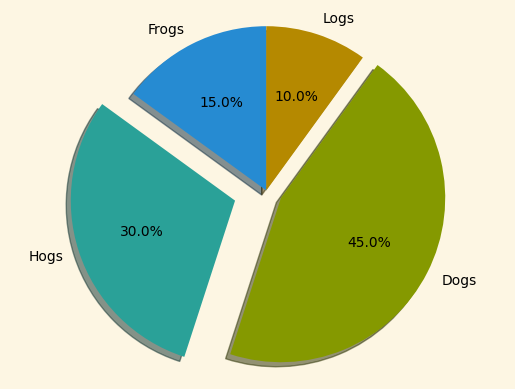

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.2, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

## Pie and polar charts example

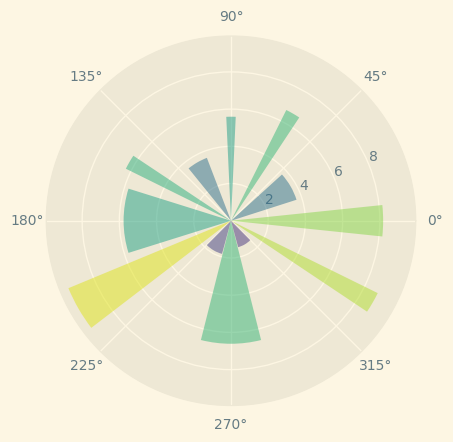

In [29]:
# Compute pie slices
N = 12
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

# Histograms, Binnings, and Density

In [30]:
data = np.random.randn(1000)

In [31]:
data[0] = 3

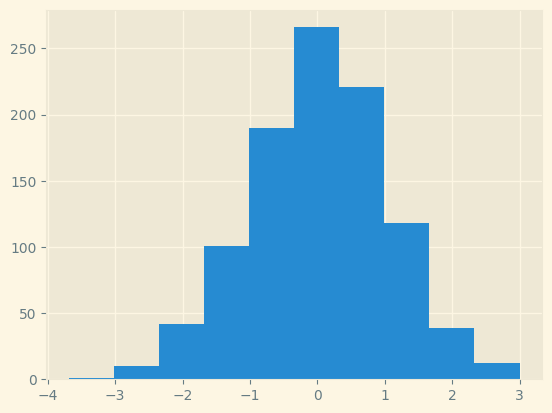

In [32]:
plt.hist(data[data < 10]);

The ``hist()`` function has many options to tune both the calculation and the display;
here's an example of a more customized histogram:

In [ ]:
plt.hist(data, bins=30,  alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

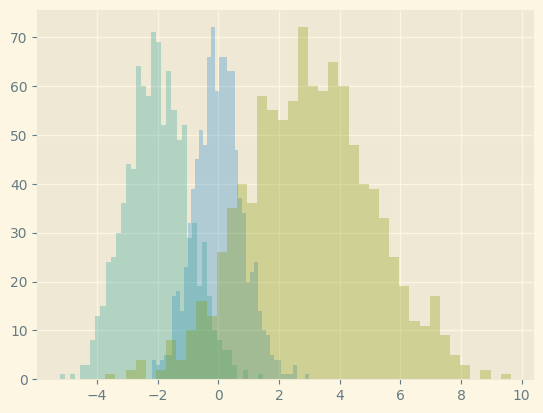

In [33]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

# Boxplot and violin

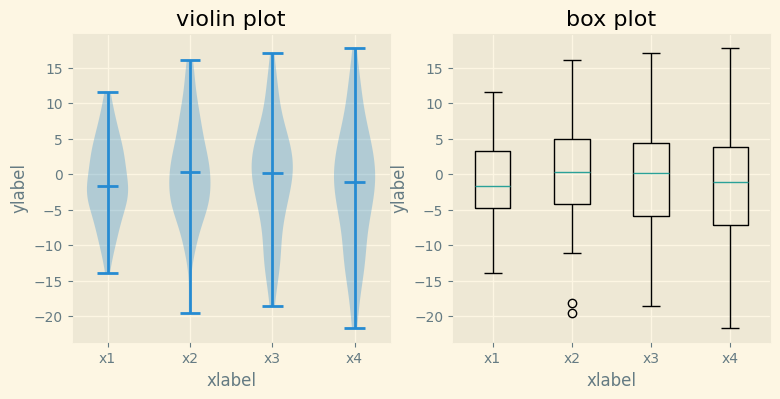

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

### Example of interpolation methods


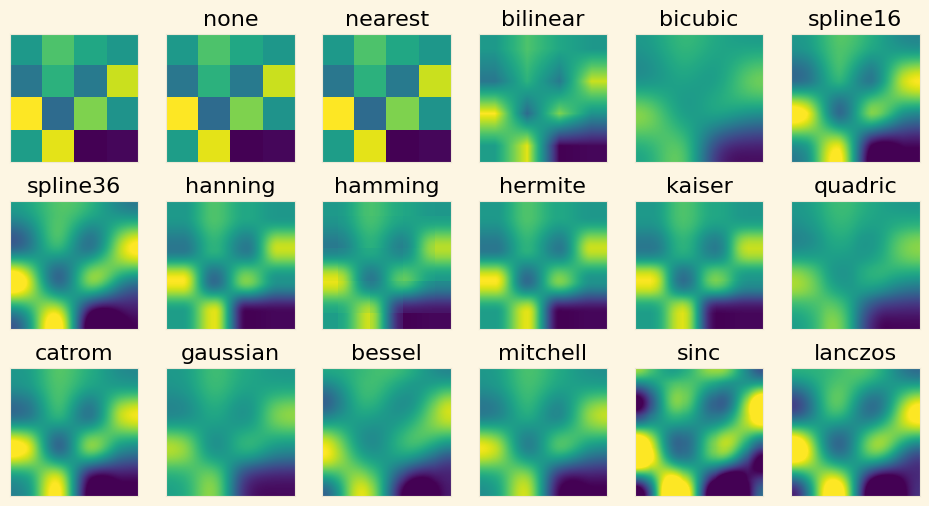

In [35]:
# from the docs:

# If interpolation is None, default to rc image.interpolation. See also
# the filternorm and filterrad parameters. If interpolation is 'none', then
# no interpolation is performed on the Agg, ps and pdf backends. Other
# backends will fall back to 'nearest'.
#
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

np.random.seed(0)
grid = np.random.rand(4,4)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(interp_method)

plt.show()

In [ ]:
grid